# Korrelation und Regression

## World Happiness Report

Der World Happiness Report (https://worldhappiness.report/) ist ein jährlich vom Sustainable Development Solutions Network der Vereinten Nationen veröffentlichter Bericht. Der Bericht enthält Ranglisten zur Lebenszufriedenheit in verschiedenen Ländern der Welt und Datenanalysen aus verschiedenen Perspektiven. 

Die wichtigste Frage der Umfrage, auf der der Bericht basiert, ist die so genannte *Cantril-Leiter*: Die Befragten werden gebeten, sich eine Leiter vorzustellen, bei der das bestmögliche Leben für sie eine 10 und das schlechtestmögliche Leben eine 0 ist. Anschließend werden sie gebeten, ihr eigenes aktuelles Leben auf dieser Skala von 0 bis 10 zu bewerten.

## Die Daten

Wir laden den Bericht aus dem Jahr 2022.

In [13]:
import pandas as pd
import plotly.express as px

whr = pd.read_csv("Daten/WHR2022.csv")

### ✏️ Aufgabe 1
Welche Dimension haben die Daten? Was repräsentiert eine Zeile in den Daten? 
Was vermuten Sie repräsentieren die Spalten? Details können Sie in der Datei WHR+22.pdf auf S.15 und S.21 nachschlagen!

### ✏️ Aufgabe 2
Der Datensatz erstreckt sich über viele Jahre, aber wir sind nur an den Daten aus dem Jahr 2021 interessiert. Filtern Sie den DataFrame `whr` für das Jahr 2021, wählen Sie alle Spalten aus und weisen Sie das Ergebnis einem DataFrame mit dem Namen `whr_2021` zu.

### ✏️ Aufgabe 3
Wie hoch ist die durchschnittliche Lebenserwartung `Healthy life expectancy at birth` über alle Länder? Können Sie aus den Daten auch die durchschnittliche Lebenserwartung aller Menschen berechnen? (wenn ja: wie? wenn nein: warum nicht?)

WIr untersuchen nun für das Jahr 2021 folgende Frage:
>Gibt es einen Zusammenhang zwischen der Lebenserwartung ("Healthy life expectancy at birth") und der Lebenszufriedenheit ("Life Ladder") in einem Land? 

Um das herauszufinden, visualisieren wir die Daten. So wie man die Verteilung *einer* Variablen mit einem Histogramm oder einem Dichteplot visualisiert, haben Statistiker eine allgemeine Methode für die Visualisierung der Beziehung zwischen zwei numerischen Variablen entwickelt: das Streudiagramm. Das Streudiagramm (oder Scatterplot) wurde auch als die ["nützlichste Erfindung in der Geschichte der statistischen Grafik"](https://onlinelibrary.wiley.com/doi/abs/10.1002/jhbs.20078) bezeichnet. Es handelt sich um ein einfaches zweidimensionales Diagramm, bei dem die beiden Koordinaten jedes Punktes die Werte von zwei Variablen darstellen, die bei einer einzigen Beobachtung gemessen wurden.

Wir erzeugen wir einen Streuplot mit plotly mit folgendem Befehl:

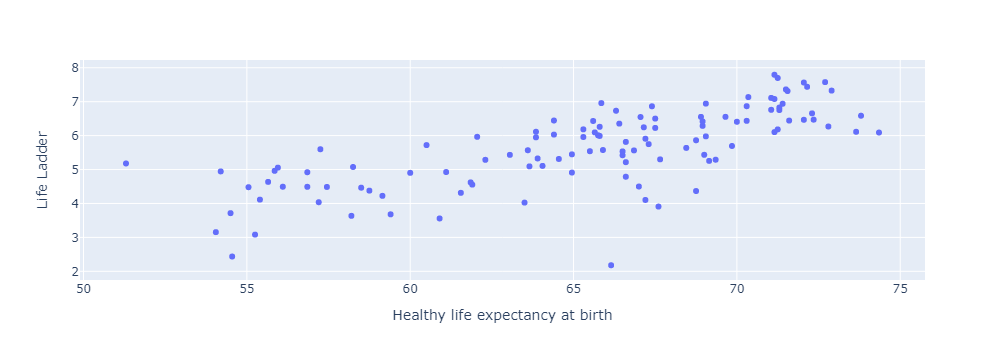

In [78]:
px.scatter(data_frame=whr_2021, x="Healthy life expectancy at birth", y="Life Ladder")

Wenn Sie die Maus über das Diagramm bewegen, werden zu jedem Punkt die x- und y-Werte angezeigt - praktisch. Noch besser wäre es, wenn wir zusätzlich zu jedem Punkt sehen würden, welches Land sich dahinter verbirgt. Dies können wir erreichen, indem wir dem Befehl `px.scatter` über das Argument `hover_name=` den Spaltennamen des DataFrames übergeben, der zu jedem Punkt den Namen des Landes enthält,hier also: `Country name`:

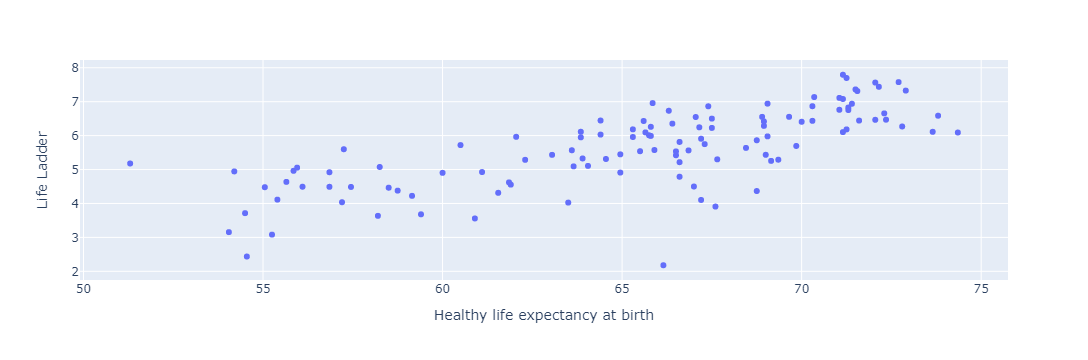

In [80]:
px.scatter(data_frame=whr_2021, x="Healthy life expectancy at birth", y="Life Ladder", hover_name="Country name")

### ✏️ Aufgabe 4
In welchem Land ist die Lebenserwartung am geringsten, in welchem am höchsten? In welchem Land sind die Menschen am zufriedensten mit ihrem Leben, in welchem am unzufriedensten?

Die Punkte im Streudiagramm liegen zwar verteilt in der Ebene, aber man kann doch erkennen, dass im Allgemeinen mit zunehmender Lebenserwartung die Lebenszufriedenheit zunimmt. Dies quantifizieren wir nun mit Hilfe des **Korrelationskoeffizienten**.

Es gibt unterschiedliche Möglichkeiten, diesen in Python zu berechnen. Wir nutzen die `.corr` Funktion von Pandas:

In [81]:
whr_2021["Healthy life expectancy at birth"].corr(whr_2021["Life Ladder"])

0.7262499344070562

Der Wert 0.726 besagt, dass es eine positive Korrelation zwischen Lebenserwartung und Lebenszufriedenheit gibt, dass also mit steigender Lebenserwartung auch die Lebenszufriedenheit steigt - und umgekehrt. Dieser Zusammenhang gilt nicht in jedem Einzelfall wie man leicht im Streudiagramms sieht. Eine gute Möglichkeit, sich die Stärke einer Korrelation zu veranschaulichen ist, die Regressionsgerade zu plotten. Würden alle Punkte genau auf der Geraden liegen, so hätte man eine perfekte Korrelation: +1, wenn die Gerade eine positive Steigung hat oder -1, wenn die Gerade eine negative Steigung hat (dies kommt bei realistischen Daten quasi nie vor).

plotly erlaubt es, die Regressionsgerade direkt im Plot zu visualisieren. Dafür muss das Modul `statsmodels` installiert sein (in der Anaconda Konsole `pip install statsmodels` eingeben). Die einfache Regressionsgerade wird über das Argument `trendline="ols"` aktiviert (ols steht für ordinary least squares).

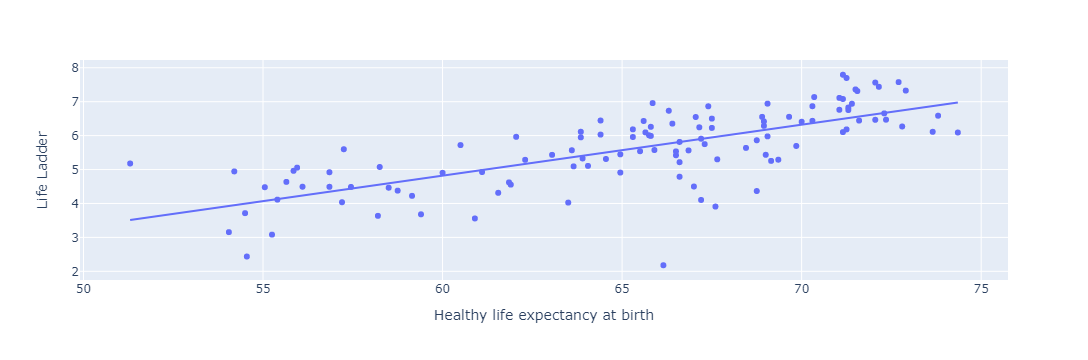

In [82]:
px.scatter(data_frame=whr_2021, x="Healthy life expectancy at birth", y="Life Ladder", hover_name="Country name", trendline="ols")

Die positive Steigung der Geraden impliziert, dass eine *positive* Korrelation vorliegt. Die *Stärke* der Korrelation ist dadurch bestimmt, wie nahe an der Geraden die Punkte typischerweise liegen. Regressionsgeraden sind also dazu geeignet "Korrelationen sichtbar zu machen". 

Praktisch: Wenn Sie die Maus über die Gerade bewegen, wird die Geradengleichung, sowie das R² Gütmaß angezeigt. Zur Erinnerung: R² ist ein Wert zwischen 0 und 1, der aussagt, wie viel der Varianz in den Daten durch den Prediktor (hier: Lebenserwartung) erklärt wird. R² ist der quadrierte Korrelationskoeffizient.  

Wenn wir die Koeffizienten der Geraden nun automatisch auslesen möchten, können wir dies wie folgt tun. Wir speichern den *Plot* in einer Variable:

In [56]:
p = px.scatter(data_frame=whr_2021, x="Healthy life expectancy at birth", y="Life Ladder", hover_name="Country name", trendline="ols")

Wenn Sie diesen Code ausführen, werden Sie merken, dass der Plot nicht angezeigt wird (er wird erzeugt und in der Variable `p` gespeichert). Wir können die Koeffizienten $\alpha$ uund $\beta$ nun mittels folgenden Befehlen aus `p` extrahieren:

In [75]:
result = px.get_trendline_results(p)
result.iloc[0,0].params

array([-4.19493172,  0.15021072])

Übrigens: mit `p.show()` könnten Sie den Plot jederzeit anzeigen.

### ✏️ Aufgabe 5
Berechnen Sie die Koeffizienten $\alpha$ und $\beta$ der Regressionsgeraden $\hat{y}=\alpha+\beta x$ mittels der Formeln aus der Vorlesung und vergleichen Sie mit den Werten oben:
- $\beta = r_{xy}\frac{\tilde{s}_y}{\tilde{s}_x}$
- $\alpha = \bar{y} - \beta \bar{x}$

Welchen Wert für Lebenszufriedenheit sagt das Modell für eine Lebenserwartung von 80 Jahren voraus?

---
Der Korrelation zwischen Lebenserwartung und Zufriedenheit war ein Beispiel für eine positive Korrelation. Natürlich können Sie für jedes beliebige Paar von Variablen die Korrelation berechnen.

### ✏️ Aufgabe 6
Zwischen welchen Variablen im Datensatz `whr_2021` vermuten Sie eine *negative* Korrelation? Warum? Verifizieren Sie ihre Vermutung, indem Sie
1. den Korrelationskoeffizienten berechnen und
2. die beiden betreffenden Merkmale sowie die Regressionsgerade in einem Streuplot anzeigen.